133 7
162 16
275 5
276 91


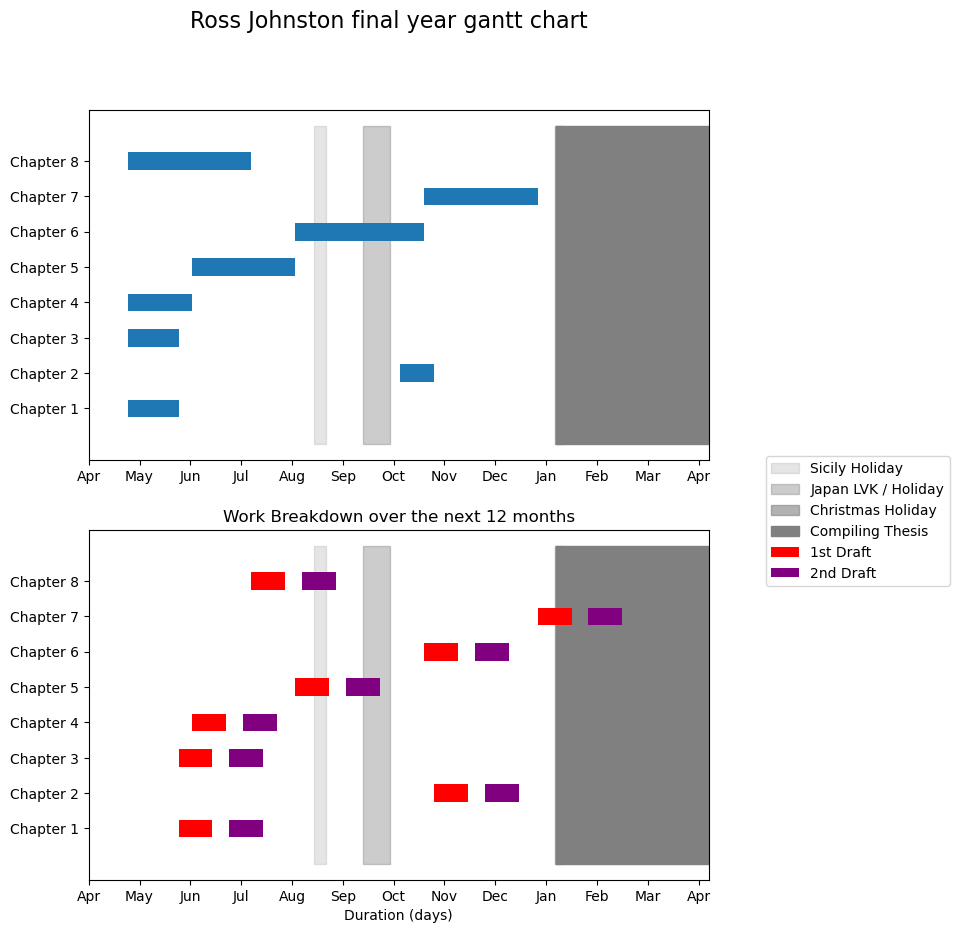

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Define the start and end dates of your project
start_date = '2023-04-21'
bar_offset = int(start_date.split('-')[2]) # offset to start the plot from the first of the month
end_date = '2024-04-21'

# Define the tasks and their start and end dates
tasks =      ['Chapter 1',   'Chapter 2',  'Chapter 3',  'Chapter 4',  'Chapter 5',  'Chapter 6',  'Chapter 7',  'Chapter 8']
task_start = ['2023-04-23', '2023-10-01', '2023-04-23', '2023-04-23',  '2023-05-31', '2023-07-31', '2023-10-15', '2023-04-23']
task_end = ['2023-05-23', '2023-10-21', '2023-05-23', '2023-05-31','2023-07-31',    '2023-10-15',  '2023-12-21', '2023-07-05']
writing_offset_list = []

x_month_labels = ['Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

# Define start and end of key holidays

holiday_start = ['2023-08-11', '2023-09-09', '2023-12-31','2024-01-01']
holiday_end = ['2023-08-18','2023-09-25','2024-01-05','2024-04-01']

alpha = [0.2,0.4,0.6,1]
labels = ['Sicily Holiday','Japan LVK / Holiday','Christmas Holiday','Compiling Thesis']


# Convert the dates to datetime objects
start = np.datetime64(start_date)
end = np.datetime64(end_date)

task_start = [np.datetime64(date)+bar_offset for date in task_start]
task_end = [np.datetime64(date)+bar_offset for date in task_end]

holiday_start = [np.datetime64(date)+bar_offset for date in holiday_start]
holiday_end = [np.datetime64(date)+bar_offset for date in holiday_end]

task_start_writing1 = task_end

# Roughly set 20 days for writing for the first and second drafts spaced by a 10 day wait for feedback

task_end_writing_1 = [np.datetime64(date) + np.timedelta64(20, 'D') for date in task_end]
task_start_writing_2 = [np.datetime64(date) + np.timedelta64(10, 'D') for date in task_end_writing_1]
task_end_writing_2 = [np.datetime64(date) + np.timedelta64(20, 'D') for date in task_start_writing_2]

# Calculate the duration of each task in days
#duration = [(end - start).astype(int) for start, end in zip(task_start, task_end)]

# Calculate the start and end positions of each task
task_pos = [(task - start).astype(int) for task in task_start]
task_width = [(end - start).astype(int) for start, end in zip(task_start, task_end)]

task_pos_write = [(task - start).astype(int) for task in task_start_writing1]
task_width_write = [(end - start).astype(int) for start, end in zip(task_start_writing1, task_end_writing_1)]

task_pos_write_2 = [(task - start).astype(int) for task in task_start_writing_2]
task_width_write_2 = [(end - start).astype(int) for start, end in zip(task_start_writing_2, task_end_writing_2)]

holiday_pos = [(task - start).astype(int) for task in holiday_start]
holiday_width = [(end - start).astype(int) for start, end in zip(holiday_start, holiday_end)]

# Create a horizontal bar chart
fig = plt.figure(figsize=(8, 10))
fig.tight_layout()
fig.suptitle('Ross Johnston final year gantt chart', fontsize=16)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Add the holiday bars
for i,hol in enumerate(holiday_pos):
    ax1.fill_between([hol,holiday_width[i]+hol], -1, len(tasks), color='grey', alpha=alpha[i],label='{0}'.format(labels[i]))
    ax2.fill_between([hol,holiday_width[i]+hol], -1, len(tasks), color='grey', alpha=alpha[i],label='{0}'.format(labels[i]))
    print(hol,holiday_width[i])
    
ax1.barh(y=range(len(tasks)), left=task_pos, width=task_width, height=0.5, align='center')

# Set the x-axis limits and ticks
ax1.set_xlim((0, (end - start).astype(int)))
ax1.set_xticks(np.arange(0, (end - start).astype(int), 30))
ax1.set_xticklabels(x_month_labels)

# Set the y-axis ticks and labels
ax1.set_yticks(range(len(tasks)))
ax1.set_yticklabels(tasks)



# Writing chart 

ax2.barh(y=range(len(tasks)), left=task_pos_write, width=task_width_write, height=0.5, align='center', color='red',label='1st Draft')
ax2.barh(y=range(len(tasks)), left=task_pos_write_2, width=task_width_write_2, height=0.5, align='center', color='purple',label='2nd Draft')

# Set the title and labels
ax2.set_title('Work Breakdown over the next 12 months')
ax2.set_xlabel('Duration (days)')
ax2.grid(axis='x')

# Set the x-axis limits and ticks
ax2.set_xlim((0, (end - start).astype(int)))
ax2.set_xticks(np.arange(0, (end - start).astype(int), 30))
ax2.set_xticklabels(x_month_labels)

# Set the y-axis ticks and labels
ax2.set_yticks(range(len(tasks)))
ax2.set_yticklabels(tasks)

# Set the title and labels
ax2.set_title('Work Breakdown over the next 12 months')
ax2.set_xlabel('Duration (days)')
ax2.grid(axis='x')

ax2.legend(loc='upper right', bbox_to_anchor=(1.4, 1.23))


# Show the plot
plt.show()